In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm


# Carregando o tema do Seaborn
sns.set()

# Carregando Datasets

__Crop Production & Climate Change:__ https://www.kaggle.com/datasets/thedevastator/the-relationship-between-crop-production-and-cli

In [3]:
production = pd.read_csv('crop_production.csv')
production = production.iloc[:,1:]
production.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,CROPYIELD,RICE,TONNE_HA,A,1990,8.314607,NaN
1,AUS,CROPYIELD,RICE,TONNE_HA,A,1991,8.394737,NaN
2,AUS,CROPYIELD,RICE,TONNE_HA,A,1992,8.094340,NaN
3,AUS,CROPYIELD,RICE,TONNE_HA,A,1993,8.336000,NaN
4,AUS,CROPYIELD,RICE,TONNE_HA,A,1994,8.537815,NaN


__Crop Recommendation Dataset:__ https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset

In [4]:
soil = pd.read_csv('Crop_recommendation.csv')
soil.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


__Climate Change: Earth Surface Temperature Data (tabela por país):__ https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data?select=GlobalLandTemperaturesByCountry.csv

In [5]:
climate = pd.read_csv('GlobalLandTemperaturesByCountry.csv')
climate.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


# Diversidade e Otimização do Solo para Agricultura

In [6]:
# Produções distintas de alimentos
soil['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

Usando pairplot do Seaborn para mostrar os agrupamentos dos dados quantitativos de acordo com o tipo de plantação:

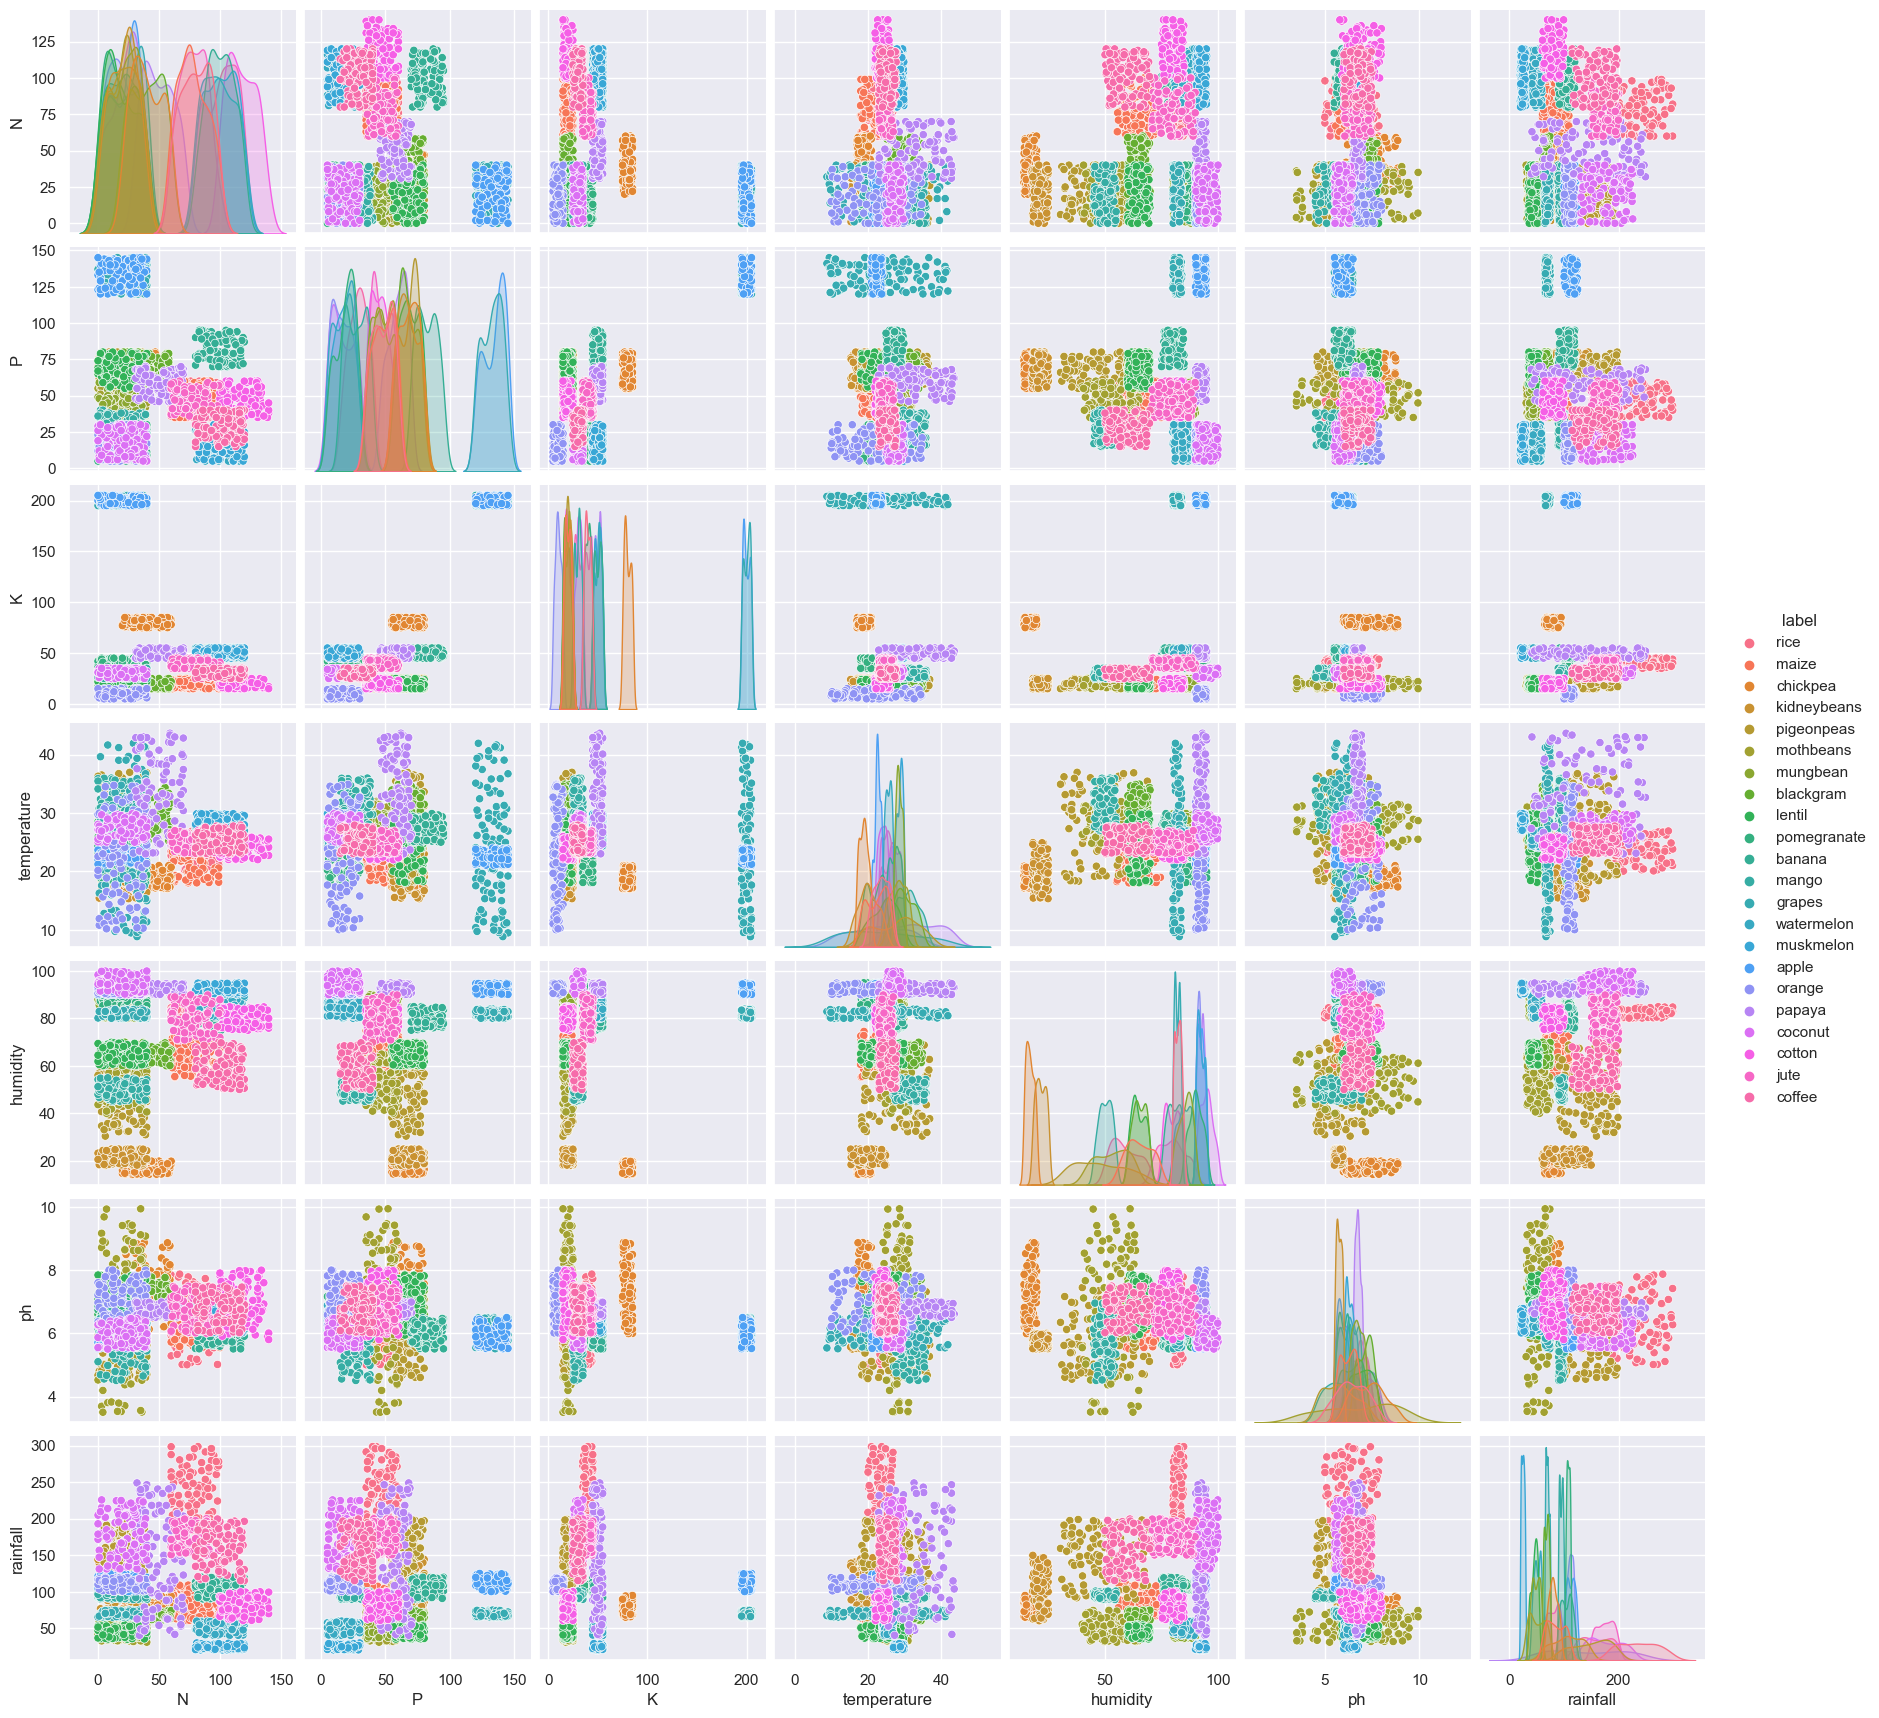

In [7]:
sns.pairplot(data=soil, hue='label')
plt.show()

Observando como cada plantação está bem definida em grupos de acordo com os gráficos, utilizaremos o modelo KNN para fazer a classificação de plantações de solos disponíveis para novas produções.

In [8]:
# Preparando Amostras Aleatorias
rng = np.random.default_rng(42)
states = rng.integers(200, size=50)
states

array([ 17, 154, 130,  87,  86, 171,  17, 139,  40,  18, 105, 195, 147,
       152, 143, 157, 102,  25, 167,  90, 100,  74,  36, 185, 156, 128,
        80, 164, 109,  88,  90,  45,  18, 110, 177,  12, 171, 165,  55,
       126,  33, 151, 140,  70,  13, 194,  89, 178, 135, 155], dtype=int64)

In [9]:
# Aplicaçao do modelo KNN
mod = KNeighborsClassifier()
X = soil.iloc[:,:-1]
Y = soil['label']
accuracies = []
precisions = []
recalls = []

# Criaçao de 50 amostras
for i in range(50):
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=states[i])
    mod.fit(X_train,Y_train)
    prev = mod.predict(X_test)
    accuracies.append(accuracy_score(prev,Y_test))
    precisions.append(precision_score(prev,Y_test, average='micro'))
    recalls.append(recall_score(prev,Y_test, average='micro'))  


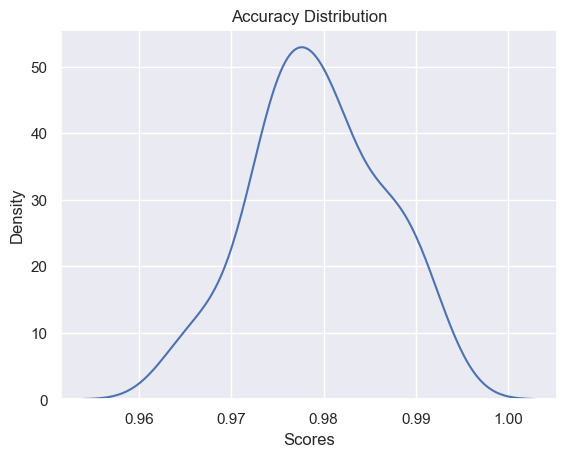

In [10]:
# Vetorizando todas as metricas
accuracies = np.array(accuracies)
precisions = np.array(precisions)
recalls = np.array(recalls)

# Vizualizaçao da Acuracia
sns.kdeplot(data=accuracies)
plt.title('Accuracy Distribution')
plt.xlabel('Scores')
plt.show()

In [11]:
print('Media do Accuracy Score: ', np.mean(accuracies))
print('Desvio Padrao do Accuracy Score: ', np.std(accuracies))
print()
print('Media do Precision Score: ', np.mean(precisions))
print('Media do Recall Score: ', np.mean(recalls))

Media do Accuracy Score:  0.9793181818181819
Desvio Padrao do Accuracy Score:  0.006971755295535442

Media do Precision Score:  0.9793181818181819
Media do Recall Score:  0.9793181818181819


A variedade de amostragem e repetição de testes comprovam a consistência do modelo usado para classificar a cultura que será empregada em uma terra recém aberta para plantação com mais de 95% de acurácia, desde que os dados sejam fornecidos para predição.

# Logística na Disposição de Terras

In [12]:
production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20566 entries, 0 to 20565
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LOCATION    20566 non-null  object 
 1   INDICATOR   20566 non-null  object 
 2   SUBJECT     20566 non-null  object 
 3   MEASURE     20566 non-null  object 
 4   FREQUENCY   20566 non-null  object 
 5   TIME        20566 non-null  int64  
 6   Value       20566 non-null  float64
 7   Flag Codes  0 non-null      float64
dtypes: float64(2), int64(1), object(5)
memory usage: 1.3+ MB


In [13]:
# Coluna 'Flag Codes' esta vazia
production = production.drop('Flag Codes', axis=1)

A relação entre país e a proporção dos tipos de produção exercidos é informativa no balanço de distribuição de alimentos. Por isso será feita uma tabela de contingência e uma análise deixará evidente onde existe escassez ou excedentes no cultivo.

In [14]:
# Valores distintos em 'LOCATION' e 'SUBJECT'
print(production['LOCATION'].unique())
print()
print(production['SUBJECT'].unique())

['AUS' 'CAN' 'JPN' 'KOR' 'MEX' 'NZL' 'TUR' 'USA' 'DZA' 'ARG' 'BGD' 'BRA'
 'CHL' 'CHN' 'COL' 'EGY' 'ETH' 'GHA' 'IND' 'IDN' 'IRN' 'KAZ' 'MYS' 'MOZ'
 'NGA' 'PAK' 'PRY' 'PER' 'PHL' 'RUS' 'SAU' 'ZAF' 'SDN' 'TZA' 'THA' 'UKR'
 'URY' 'VNM' 'ZMB' 'WLD' 'SSA' 'OECD' 'BRICS' 'NOR' 'CHE' 'EU28' 'ISR'
 'HTI']

['RICE' 'WHEAT' 'MAIZE' 'SOYBEAN']


In [15]:
# Tabela de contingência
pd.crosstab(production['LOCATION'],production['SUBJECT'])

SUBJECT,MAIZE,RICE,SOYBEAN,WHEAT
LOCATION,,,,
ARG,108,108,108,108
AUS,108,108,108,108
BGD,108,108,108,108
BRA,108,108,108,108
BRICS,108,108,108,108
CAN,108,108,108,108
CHE,108,108,108,108
CHL,108,108,108,108
CHN,108,108,108,108


In [16]:
production = production.drop(production[(production['LOCATION'] == 'BRICS') |
                                        (production['LOCATION'] == 'EU28') |
                                        (production['LOCATION'] == 'OECD') |
                                        (production['LOCATION'] == 'WLD')].index)

Dado a natureza da coleta dos dados da tabela _production_, não existe diferença na quantidade de terras e na variedade das mesmas em cada localidade (Países, desconsiderando os Blocos Econômicos), em uma primeira observação. Entretanto deve ser considerado a variação no porte de cada propriedade e o quanto as mesmas são eficientes na produção.

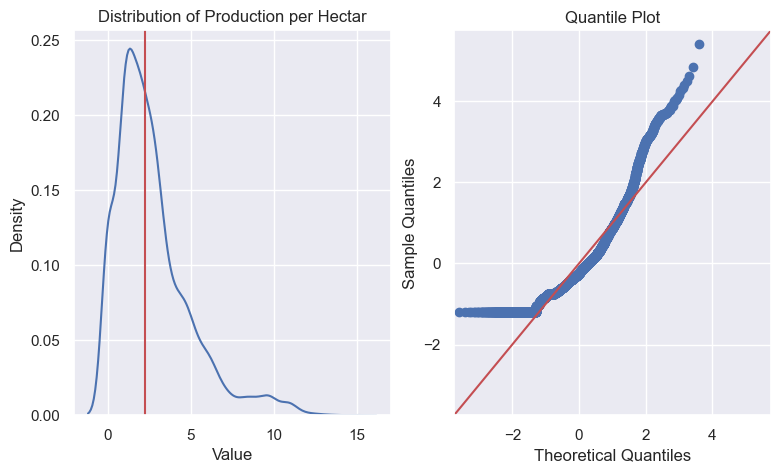

In [17]:
# Distribuição da produção por hectares
pph = production.loc[production['MEASURE'] == 'TONNE_HA'].copy()

fig,axs = plt.subplots(1,2, figsize=(9,5))

# Grafico de otimizaçao do plantio
sns.kdeplot(data=pph['Value'], ax=axs[0])
axs[0].axvline(pph['Value'].std(), color='r')
axs[0].title.set_text('Distribution of Production per Hectar')

# Verificaçao da distribuiçao dos dados (Gaussiana)
# Valores foram padronizados antes do processamento do plot
sm.qqplot(data=stats.zscore(pph['Value']), line='45', ax=axs[1])
axs[1].title.set_text('Quantile Plot')
plt.show()

Apesar da assimetria dos gráficos ainda é possível afirmar que a distribuição dos valores é Normal (Gaussiana), como indica este artigo no blog _Medium_: https://towardsdatascience.com/q-q-plots-explained-5aa8495426c0. Portanto a padronização dos dados poderá prosseguir de uma classificação por quantis.

In [18]:
# Padronizaçao por zscore do scipy
pph['Value'] = stats.zscore(pph['Value'])
pph['Value'].describe()

count    6.335000e+03
mean    -6.954009e-17
std      1.000079e+00
min     -1.193641e+00
25%     -7.044040e-01
50%     -2.392579e-01
75%      3.951843e-01
max      5.426465e+00
Name: Value, dtype: float64

In [19]:
# Classificaçao por rendimento atraves de quantis personalizados e arbitrarios
pph['Class Production'] = pd.qcut(pph['Value'],
                                  q=[0, 0.15, 0.25, 0.75, 0.85, 1],
                                  labels=['L2','L1','AVG','H1','H2'])
'''
L1 -> Lower 1
L2 -> Lower 2
AVG -> Average
H1 -> Higher 1
H2 -> Higher 2
'''

'\nL1 -> Lower 1\nL2 -> Lower 2\nAVG -> Average\nH1 -> Higher 1\nH2 -> Higher 2\n'

Classificar o rendimento das colheitas facilita o direcionamento de órgãos governamentais e proprietarios a fim de identificar potenciais em áreas que necessitam maior atenção.

As propriedades classificadas como __LOWER__ supostamente são as menos produtivas enquanto as classes __HIGHER__ são as terras que possivelmente estarão mais desgastadas ou possuem mais eficiência.

In [20]:
production['SUBJECT'].unique()

array(['RICE', 'WHEAT', 'MAIZE', 'SOYBEAN'], dtype=object)

In [21]:
# Proporçao de produçao por cultura, pais e ano
proportion = production.loc[production['MEASURE'] == 'TONNE_HA'].copy()
proportion = proportion.groupby(['SUBJECT','LOCATION','TIME'])['Value'].mean()

# Dividindo as culturas
# Rice
rice = proportion.loc['RICE']

# Wheat
wheat = proportion['WHEAT']

# Maize
maize = proportion['MAIZE']

# Soybean
soybean = proportion['SOYBEAN']

In [22]:
rice

LOCATION  TIME
ARG       1990    3.466064
          1991    3.020611
          1992    2.828500
          1993    2.794679
          1994    3.269696
                    ...   
ZMB       2021    0.939848
          2022    0.953259
          2023    0.966970
          2024    0.980687
          2025    0.994359
Name: Value, Length: 1583, dtype: float64

In [23]:
wheat

LOCATION  TIME
ARG       1990    1.912281
          1991    2.172308
          1992    2.320564
          1993    2.012083
          1994    2.165900
                    ...   
ZMB       2021    7.131621
          2022    7.202730
          2023    7.275102
          2024    7.347619
          2025    7.421652
Name: Value, Length: 1584, dtype: float64

In [24]:
maize

LOCATION  TIME
ARG       1990    3.461538
          1991    4.044211
          1992    4.524313
          1993    4.355174
          1994    4.237219
                    ...   
ZMB       2021    3.186726
          2022    3.266205
          2023    3.348090
          2024    3.432258
          2025    3.518253
Name: Value, Length: 1584, dtype: float64

In [25]:
soybean

LOCATION  TIME
ARG       1990    2.421053
          1991    2.291329
          1992    2.158913
          1993    2.038261
          1994    2.044313
                    ...   
ZMB       2021    1.183424
          2022    1.184341
          2023    1.184535
          2024    1.182725
          2025    1.184740
Name: Value, Length: 1584, dtype: float64

In [26]:
pph['Class Production']

0         H2
1         H2
2         H2
3         H2
4         H2
        ... 
20212    AVG
20213    AVG
20214    AVG
20215    AVG
20216    AVG
Name: Class Production, Length: 6335, dtype: category
Categories (5, object): ['L2' < 'L1' < 'AVG' < 'H1' < 'H2']

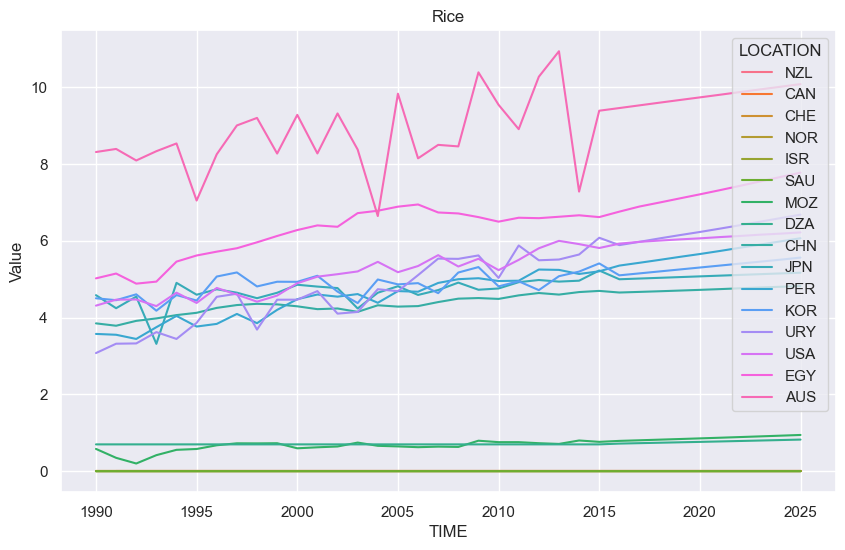

In [27]:
# Plantaçoes de arroz ao longo dos anos
# Separado os 8 maiores e 8 menores
temp = rice.groupby('LOCATION').mean().sort_values()
concat = pd.concat([temp.head(8),temp.tail(8)])
ht = rice.loc[concat.index.to_numpy(),:]
graph_rice = ht.reset_index()

fig,axs = plt.subplots(1, figsize=(10,6))
sns.lineplot(data=graph_rice, x='TIME', y='Value', hue='LOCATION')
plt.title('Rice')
plt.show()

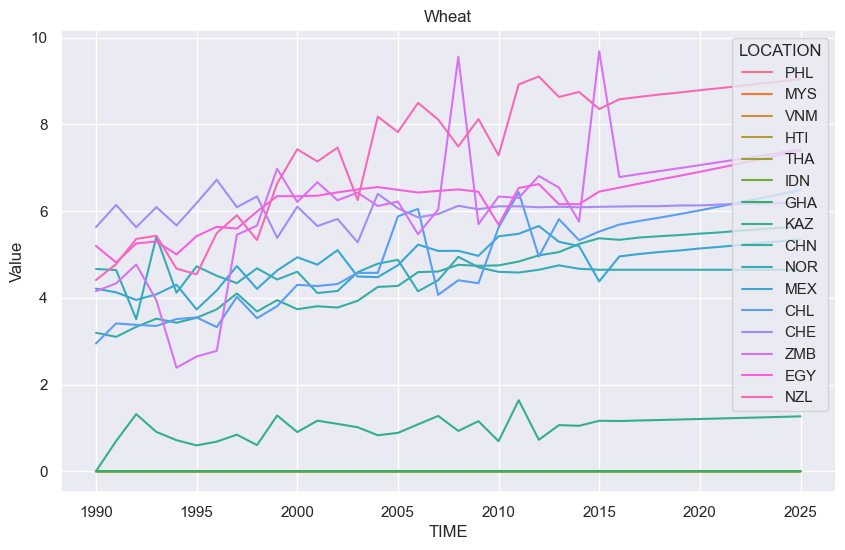

In [28]:
# Plantaçoes de trigo ao longo dos anos
# Separado os 8 maiores e 8 menores
temp = wheat.groupby('LOCATION').mean().sort_values()
concat = pd.concat([temp.head(8),temp.tail(8)])
ht = wheat.loc[concat.index.to_numpy(),:]
graph_wheat = ht.reset_index()

fig,axs = plt.subplots(figsize=(10,6))
sns.lineplot(data=graph_wheat, x='TIME', y='Value', hue='LOCATION')
plt.title('Wheat')
plt.show()

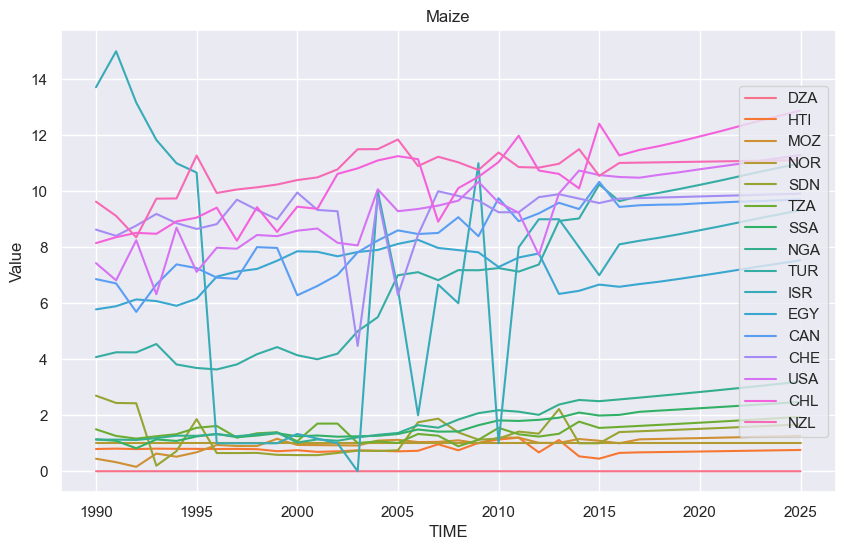

In [29]:
# Plantaçoes de milho ao longo dos anos
# Separado os 8 maiores e 8 menores
temp = maize.groupby('LOCATION').mean().sort_values()
concat = pd.concat([temp.head(8),temp.tail(8)])
ht = maize.loc[concat.index.to_numpy(),:]
graph_maize = ht.reset_index()

fig,axs = plt.subplots( figsize=(10,6))
sns.lineplot(data=graph_maize, x='TIME', y='Value', hue='LOCATION')
plt.title('Maize')
plt.legend(loc='right')
plt.show()

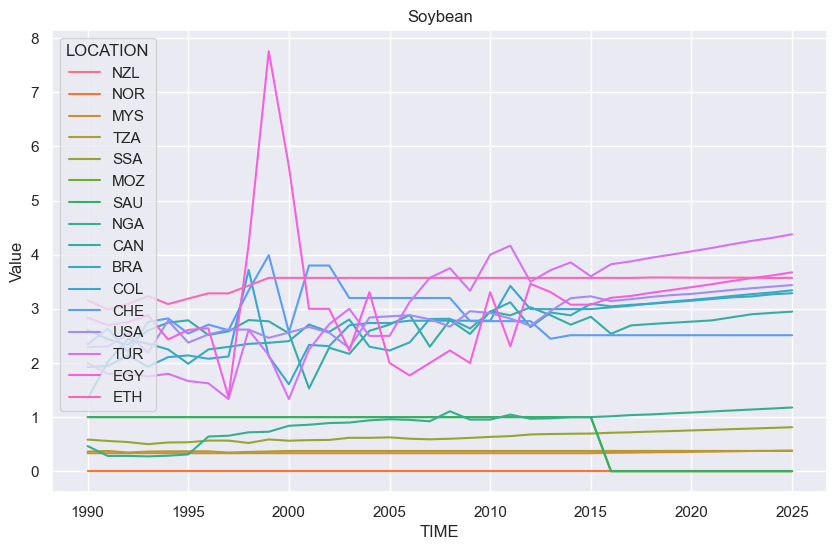

In [30]:
# Plantaçoes de soja ao longo dos anos
# Separado os 8 maiores e 8 menores
temp = soybean.groupby('LOCATION').mean().sort_values()
concat = pd.concat([temp.head(8),temp.tail(8)])
ht = soybean.loc[concat.index.to_numpy(),:]
graph_soybean = ht.reset_index()

fig,axs = plt.subplots(figsize=(10,6))
sns.lineplot(data=graph_soybean, x='TIME', y='Value', hue='LOCATION')
plt.title('Soybean')
plt.show()

# Previsão da Colheita sob a Influência do Clima

In [31]:
# Criando a relaçao entre tempo (anos) e produtividade (unidade milhares de toneladas)
crops_time = production.groupby(['TIME','MEASURE'])['Value'].mean()
crops_time = crops_time.loc[:, 'THND_TONNE']
crops_time = crops_time.sort_index(level=0)

In [32]:
crops_time.head(10)

TIME
1970    0.0001
1971    0.0001
1972    0.0001
1973    0.0001
1974    0.0001
1975    0.0001
1976    0.0001
1977    0.0001
1978    0.0001
1979    0.0001
Name: Value, dtype: float64

In [33]:
# Ajustando os dados de crops_time
crops_time = crops_time.loc[crops_time >= 0.1]

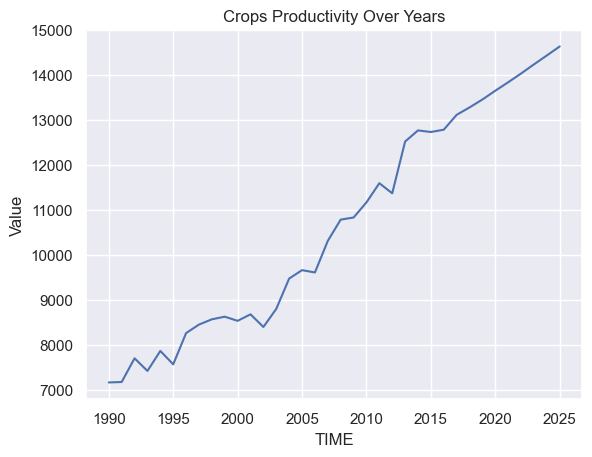

In [34]:
# Gráfico para mostrar o crescimento da produtividade ao longo dos anos
sns.lineplot(data=crops_time)
plt.title('Crops Productivity Over Years')
plt.show()

In [35]:
# Informaçoes da coluna TIME
production['TIME'].describe()

count    19025.000000
mean      2007.473325
std         10.422863
min       1970.000000
25%       1998.000000
50%       2007.000000
75%       2016.000000
max       2025.000000
Name: TIME, dtype: float64

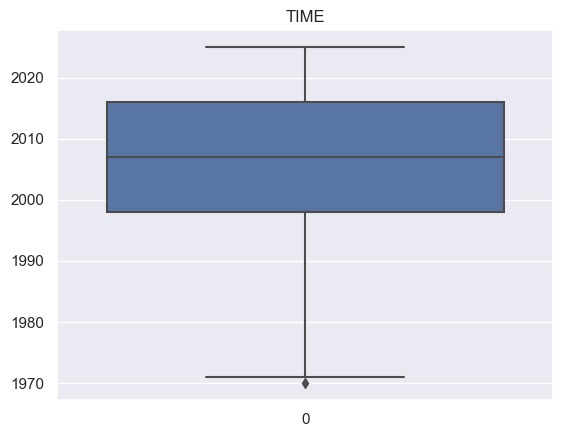

In [36]:
# Distribuição dos dados por tempo
sns.boxplot(data=production['TIME'])
plt.title('TIME')
plt.show()

A evolução dos meios de produção de alimentos podem sofrer influência de diversas variáveis, tornando inválido uma leitura de crescimento contínuo e indeterminado das plantações para combate da fome.

O Aquecimento Global é uma preocução mundial que causa catástrofes e têm sido debatida pela ONU consecutivos anos a fim de trazer uma solução para as suas causas. No entanto, a mudança climática é uma realidade que têm influenciado a produção de alimentos pelo mundo e deve ser analisada. 

Os dados de mudança de temperatura aqui mostrarão as expectativas de elevação de temperatura.

In [115]:
climate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   dt                             577462 non-null  datetime64[ns]
 1   AverageTemperature             544811 non-null  float64       
 2   AverageTemperatureUncertainty  545550 non-null  float64       
 3   Country                        577462 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 22.0+ MB


In [116]:
# Ordenando o dataset por tempo
climate['dt'] = pd.to_datetime(climate['dt'])
climate = climate.sort_values(by='dt')

In [117]:
# Agrupando os dados por tempo, independente do país
global_warming = climate.groupby(['dt'])['AverageTemperature'].mean()
global_warming.head()

dt
1743-11-01    5.18414
1743-12-01        NaN
1744-01-01        NaN
1744-02-01        NaN
1744-03-01        NaN
Name: AverageTemperature, dtype: float64

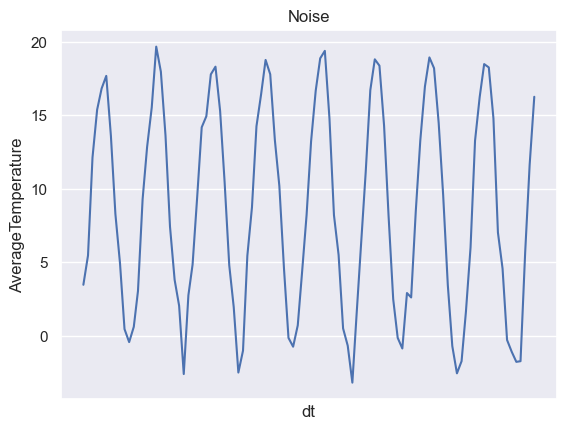

In [118]:
# Demonstrando a Série Temporal que segue uma tendencia como sera visto adiante
fig, axs = plt.subplots()
sns.lineplot(data=global_warming.iloc[400:500])
axs.set_xticks([])
axs.set_xticklabels([])
plt.title('Noise')
plt.show()

In [119]:
# Moving Averages em Intervalos diferentes
ma1 = global_warming.rolling(12).mean().to_frame()
ma2 = global_warming.rolling(24).mean().to_frame()
ma3 = global_warming.rolling(36).mean().to_frame()

# Definindo os intervalos (Moving Averages)
ma1['Window'] = '1 Year'
ma2['Window'] = '2 Years'
ma3['Window'] = '3 Years'

# Concatenando as tabelas
MA = pd.concat([ma1,ma2,ma3], axis=0).reset_index()

In [120]:
# Estabelecendo o dominio de 'dt'
MA['dt'].unique().shape

(3239,)

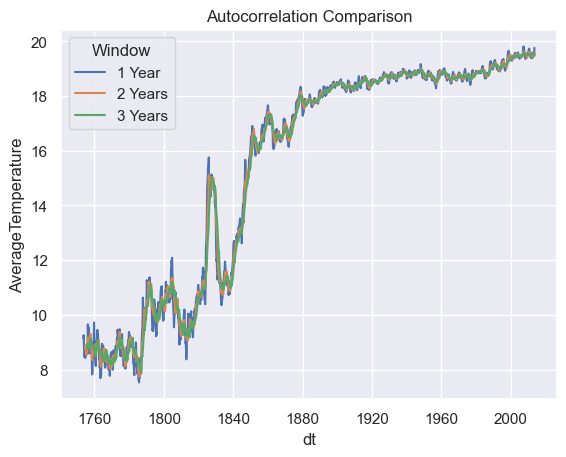

In [121]:
# Comparaçao das janelas de Moving Averages
fig,ax = plt.subplots()
sns.lineplot(data=MA, x='dt', y='AverageTemperature', hue='Window')
plt.title('Autocorrelation Comparison')
plt.show()

Entre 2 e 3 anos de intervalos definidos para análise da série temporal, não parece haver uma diferença significativa. Porém é perceptível o lag que aparece com a janela de 1 ano.

In [122]:
climate.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
551641,1743-11-01,7.086,1.831,United Kingdom
460204,1743-11-01,5.151,2.557,Serbia
289418,1743-11-01,0.936,2.088,Latvia
237217,1743-11-01,5.041,2.374,Hungary


In [123]:
# Criando a base para o modelo preditivo
periods = climate.loc[:,['AverageTemperature','dt']]

# Scikit-learn nao aceita datetime como variavel, entao uma adaptaçao sera feita
periods['AT1'] = np.arange(len(periods['AverageTemperature']))

for i in range(2,25):
    periods[f'AT{i}'] = periods['AT1'].shift(i - 1)
    
periods = periods.dropna()

In [124]:
# Preparando Amostras Aleatorias
states = rng.integers(0,2000, size=35)
states

array([1323,  252, 1114, 1010, 1567, 1992, 1328,  818,  812,  835, 1628,
        642,  333,  668,   45,  212,  180, 1543, 1444, 1393,  923, 1434,
        322, 1801, 1002, 1876,  304,  994, 1392,  991,  892,  332,  762,
        477,  603], dtype=int64)

In [125]:
mse = []                  # Mean Squared Error
mod = LinearRegression()  # Carregando Modelo  

In [126]:
periods.columns

Index(['AverageTemperature', 'dt', 'AT1', 'AT2', 'AT3', 'AT4', 'AT5', 'AT6',
       'AT7', 'AT8', 'AT9', 'AT10', 'AT11', 'AT12', 'AT13', 'AT14', 'AT15',
       'AT16', 'AT17', 'AT18', 'AT19', 'AT20', 'AT21', 'AT22', 'AT23', 'AT24'],
      dtype='object')

In [127]:
# Executando modelo de Regressao Linear
for i in range(35):
    X_train, X_test, Y_train, Y_test = train_test_split(periods.iloc[:,2:],
                                                        periods['AverageTemperature'],
                                                        test_size=0.25,
                                                        random_state=states[i])
    mod.fit(X_train, Y_train)
    Y_prev = mod.predict(X_test)
    mse.append(mean_squared_error(Y_prev, Y_test))

In [128]:
# Vetorizando o MSE
mse = np.array(mse)

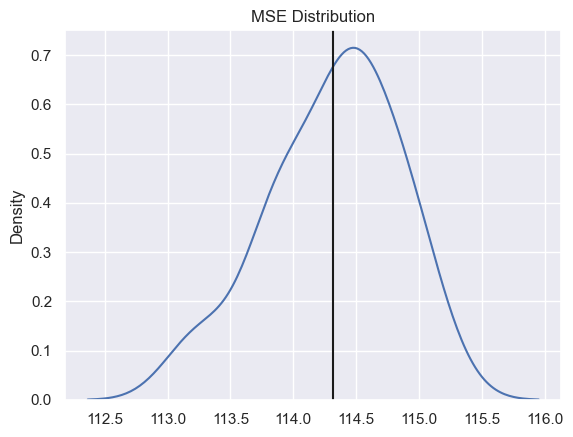

In [129]:
# Distribuição do MSE para verificaçao do resultado
sns.kdeplot(data=mse)
plt.title('MSE Distribution')
plt.axvline(np.mean(mse), color='k')
plt.show()

In [130]:
# Algumas estatisticas do MSE
print('Media do MSE: ', np.mean(mse))
print()
print('Q1/Q3: ', np.quantile(mse,[0.25, 0.75]))
print()
print('Raiz de MSE: ', np.sqrt(np.mean(mse)))

Media do MSE:  114.31144063288916

Q1/Q3:  [113.9264559 114.6185357]

Raiz de MSE:  10.691652848502384


In [131]:
# Comparaçao com as medias de temperatura
periods.iloc[:,0].describe()

count    544788.000000
mean         17.193860
std          10.953899
min         -37.658000
25%          10.027000
50%          20.901000
75%          25.814000
max          38.842000
Name: AverageTemperature, dtype: float64

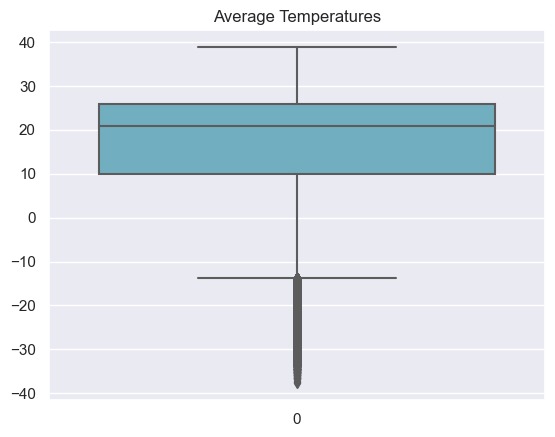

In [132]:
# Boxplot das temperaturas medias
avg_temp = periods.iloc[:,0]
sns.boxplot(data=avg_temp.values, color='c')
plt.title('Average Temperatures')
plt.show()

In [133]:
# Teste com periodos de 12 (1 ano) e 36 (3 anos) meses
periods1 = climate.loc[:,['AverageTemperature','dt']]
periods3 = climate.loc[:,['AverageTemperature','dt']]

periods1['AT1'] = np.arange(len(periods1['AverageTemperature']))
periods3['AT1'] = np.arange(len(periods3['AverageTemperature']))

# periodo 1
for i in range(2,13):
    periods1[f'AT{i}'] = periods1['AT1'].shift(i - 1)
    
# periodo 1
for i in range(2,37):
    periods3[f'AT{i}'] = periods3['AT1'].shift(i - 1)
    
periods1 = periods1.dropna()
periods3 = periods3.dropna()

In [134]:
mse1 = []
mse3 = []

In [135]:
# Executando modelo de Regressao Linear para os outros periodos
# periodo 1
for i in range(35):
    X_train, X_test, Y_train, Y_test = train_test_split(periods1.iloc[:,2:],
                                                        periods1['AverageTemperature'],
                                                        test_size=0.25,
                                                        random_state=states[i])
    mod.fit(X_train, Y_train)
    Y_prev = mod.predict(X_test)
    mse1.append(mean_squared_error(Y_prev, Y_test))

# periodo 3
# Executando modelo de Regressao Linear
for i in range(35):
    X_train, X_test, Y_train, Y_test = train_test_split(periods3.iloc[:,2:],
                                                        periods3['AverageTemperature'],
                                                        test_size=0.25,
                                                        random_state=states[i])
    mod.fit(X_train, Y_train)
    Y_prev = mod.predict(X_test)
    mse3.append(mean_squared_error(Y_prev, Y_test))

In [ ]:
# Vetorizando o MSE 1 e 3
mse1 = np.array(mse1)
mse3 = np.array(mse3)

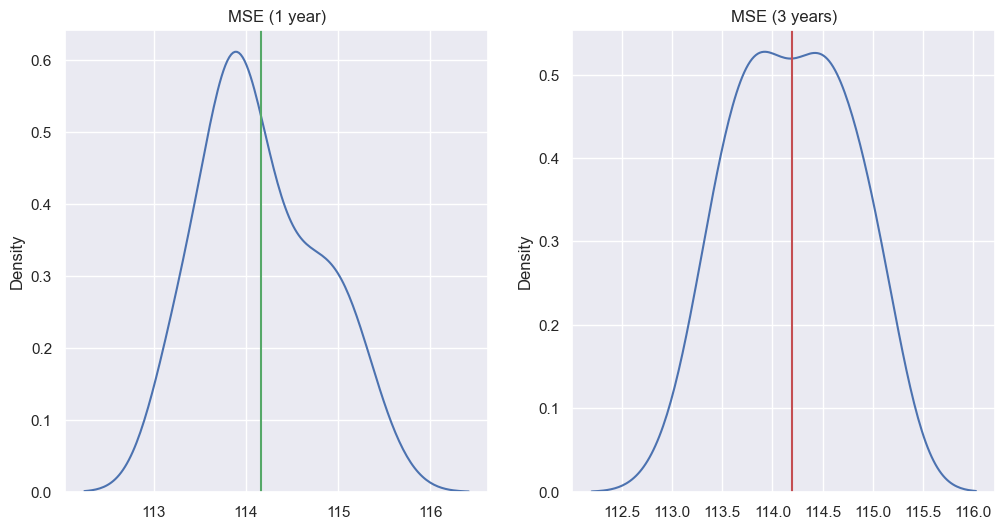

In [ ]:
# Distribuição dos MSE's
fig,axs = plt.subplots(1,2, figsize=(12,6))

# period 1
sns.kdeplot(data=mse1, ax=axs[0])
axs[0].title.set_text('MSE (1 year)')
axs[0].axvline(np.mean(mse1), color='g')

# period 3
sns.kdeplot(data=mse3, ax=axs[1])
axs[1].title.set_text('MSE (3 years)')
axs[1].axvline(np.mean(mse3), color='r')
plt.show()

In [ ]:
print('MSE 1 Year')
print('Media do MSE: ', np.mean(mse1))
print()
print('Q1/Q3: ', np.quantile(mse1,[0.25, 0.75]))
print()
print('Raiz de MSE: ', np.sqrt(np.mean(mse1)))

MSE 1 Year
Media do MSE:  114.16014385786413

Q1/Q3:  [113.78579593 114.6651953 ]

Raiz de MSE:  10.684575043391483


In [ ]:
print('MSE 3 Year')
print('Media do MSE: ', np.mean(mse3))
print()
print('Q1/Q3: ', np.quantile(mse3,[0.25, 0.75]))
print()
print('Raiz de MSE: ', np.sqrt(np.mean(mse3)))

MSE 3 Year
Media do MSE:  114.19268471417452

Q1/Q3:  [113.77873305 114.57775509]

Raiz de MSE:  10.686097730891971


Com a contrução do modelo preditivo possibilita o uso deste estimador para coleta de informações de futuras colheitas. Este é um passo muito importante para reorganizar tanto a produção quanto a distribuição dos alimentos.